In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("model_data.csv")

In [34]:
# Separate Features from Labels
# For Features I get all columns except the last one
X = data.iloc[:, :-1].values

# For features I can about the Risk Score which is the last column
y = data.iloc[:, -1].values

In [35]:
# Encoding Categorical Values
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[9])] , remainder ='passthrough' )
X = np.array(ct.fit_transform(X))

In [36]:
# Test - Train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [37]:
# Scale the data to ensure uniformity in the Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Model Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
# Make Predictions
y_pred = regressor.predict(X_test)

In [40]:
# Show the values Vertically not Horizontally
np.set_printoptions(precision = 2)
print("Predictions VS Real Results")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))


Predictions VS Real Results
[[43.84 34.4 ]
 [52.77 53.  ]
 [56.55 60.  ]
 ...
 [50.12 57.  ]
 [50.66 52.  ]
 [38.36 32.  ]]


# Evaluation Metrics

# R2 Squared
It is also known as the coefficient of determination. This metric gives an indication of how good a model fits a given dataset. It indicates how close the regression line (i.e the predicted values plotted) is to the actual data values. The R squared value lies between 0 and 1 where 0 indicates that this model doesn't fit the given data and 1 indicates that the model fits perfectly to the dataset provided.

In [41]:
# R2 Squared
scores = cross_val_score(LinearRegression(), X, y,scoring='r2')
print("The R-squared is:", scores)
# The model does not fit the given data - low score

The R-squared is: [0.44 0.46 0.43 0.4  0.41]


# Mean Absolut Error
Mean Absolute Error(MAE) is the mean size of the mistakes in collected predictions. We know that an error basically is the absolute difference between the actual or true values and the values that are predicted. The absolute difference means that if the result has a negative sign, it is ignored.

Hence, MAE = True values – Predicted values

MAE takes the average of this error from every sample in a dataset and gives the output.

In [47]:
error = mean_absolute_error(y_test, y_pred)
print("The Mean Absolute Error is :", error)
print(f"{error} indicates that, on average, the model's predictions for the RiskScore deviate from the actual values by {error} units.")

The Mean Absolute Error is : 4.615360093815341
4.615360093815341 indicates that, on average, the model's predictions for the RiskScore deviate from the actual values by 4.615360093815341 units.


In [ ]:
# Accuracy Test
# Cross validation 3 because 10 is very heavy
#Incorporating cross-validation ensures the model generalizes well and avoids overfitting.
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 3)
print(accuracies)

[0.42 0.43 0.43]


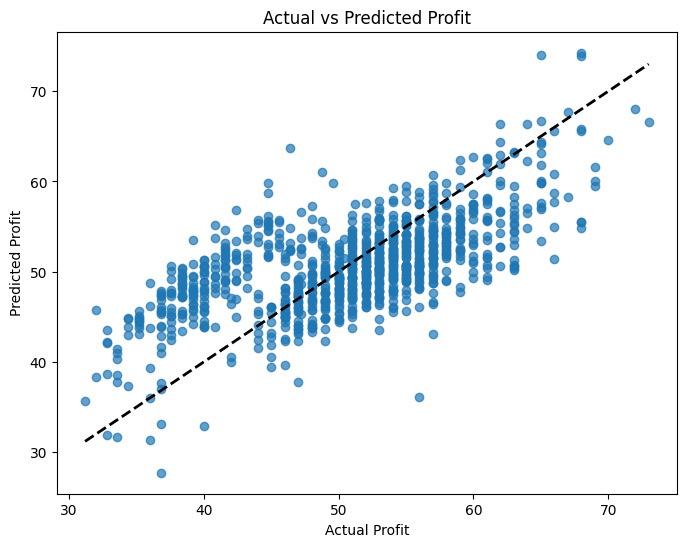

In [ ]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.show()